<a href="https://colab.research.google.com/github/paramveerkaur1/basicML/blob/main/24MDA10058_Python_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Loading and displaying dataset
#ATTENTION: This simple dataset is obtained from a psychology experiment in which twenty subjects performed
# a memory task where they studied anagrams while their attention was either divided or focused.

# The attention variable is between-subjects, but there is also a within-subjects
# variable: the number of possible solutions to the anagrams, which varied from 1 to 3.
# The dependent measure is a score of memory performance.

attn = sns.load_dataset("attention")
data = pd.DataFrame(attn)
data.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [4]:
# A. NUMPY OPERATIONS

# 1. Create at least 2 NumPy arrays from your dataset

solutions = np.array(data['solutions'])
scores = np.array(data['score'])
print("Solutions:\n", solutions)
print("Scores:\n", scores)


# 2. Perform basic array operations

# Reshape arrays
solutions_reshaped = solutions.reshape(6, 10)
scores_reshaped = scores.reshape(6, 10)
print("Reshaped Solutions Data:\n", solutions_reshaped)
print("Reshaped Scores Data:\n", scores_reshaped)

#Arithmetic operations
sum = solutions_reshaped + scores_reshaped
print("Sum:\n", sum)

prod = solutions_reshaped * scores_reshaped
print("Product:\n", prod)

diff = solutions_reshaped - scores_reshaped
print("Difference:\n", diff)

Solutions:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Scores:
 [2.  3.  3.  5.  4.  5.  5.  5.  2.  6.  6.  8.  6.  8.  8.  6.  7.  7.
 5.  6.  4.  4.  5.  7.  5.  5.  4.5 7.  3.  5.  5.  9.  5.  8.  8.  8.
 7.  8.  6.  6.  7.  5.  6.  5.  8.  6.  6.  8.  7.  6.  6.  8.  9.  7.
 7.  7.  6.  6.  6.  5. ]
Reshaped Solutions Data:
 [[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]]
Reshaped Scores Data:
 [[2.  3.  3.  5.  4.  5.  5.  5.  2.  6. ]
 [6.  8.  6.  8.  8.  6.  7.  7.  5.  6. ]
 [4.  4.  5.  7.  5.  5.  4.5 7.  3.  5. ]
 [5.  9.  5.  8.  8.  8.  7.  8.  6.  6. ]
 [7.  5.  6.  5.  8.  6.  6.  8.  7.  6. ]
 [6.  8.  9.  7.  7.  7.  6.  6.  6.  5. ]]
Sum:
 [[ 3.   4.   4.   6.   5.   6.   6.   6.   3.   7. ]
 [ 7.   9.   7.   9.   9.   7.   8.   8.   6.   7. ]
 [ 6.   6.   7.   9.   7.   7.   6.5  9.   5.   7. ]
 [

In [75]:
# B. Data Cleaning with PANDAS

# 1. Check for missing values and handle them appropriately
missing_values = data.columns[data.isnull().any()]
print("Columns with missing values:\n", missing_values)
if len(missing_values) > 0:
  data["score"] = data["score"].fillna(data["score"].mean())
  data["solutions"] = data["solutions"].fillna(data["solutions"].mode())
  data["subject"] = data["subject"].fillna('0')
  data["attention"] = data["attention"].fillna(data["attention"].mode())
else:
  print("No missing values to handle")

data = data[["subject","attention","solutions","score"]]
data.head()

# 2. Create a summary statistics table for your numerical columns
summary_stats = data.describe()
print("Summary Statistics:\n", summary_stats)

# 3. Perform at least one data transformation (e.g., normalisation, creating new features)
# Transforming available data into average scores and solutions, grouped by subject who obtains them
# Changing Attention feature from text into numerical categorical variable

grouped_data1 = data[['attention']].groupby(data['subject']).first()
grouped_data2 = data[['score','solutions']].groupby(data['subject']).max()
grouped_data = pd.merge(grouped_data1, grouped_data2, on='subject').reset_index()
grouped_data['Subj'] = data['subject']
grouped_data.rename(columns={'score': 'AvgScore', 'solutions': 'AvgSol',
                             'attention':"Attn"}, inplace=True)

def attn_transform(attn):
  if attn == 'focused':
     return 1
  else:
     return 2

grouped_data["AttnVal"] = grouped_data["Attn"].apply(attn_transform)
grouped_data = grouped_data[['Subj','AttnVal','AvgScore','AvgSol']]
print("Grouped Data:\n", grouped_data)

Columns with missing values:
 Index([], dtype='object')
No missing values to handle
Summary Statistics:
          subject  solutions      score
count  60.000000  60.000000  60.000000
mean   10.500000   2.000000   5.958333
std     5.814943   0.823387   1.621601
min     1.000000   1.000000   2.000000
25%     5.750000   1.000000   5.000000
50%    10.500000   2.000000   6.000000
75%    15.250000   3.000000   7.000000
max    20.000000   3.000000   9.000000
Grouped Data:
     Subj  AttnVal  AvgScore  AvgSol
0      1        2       7.0       3
1      2        2       5.0       3
2      3        2       6.0       3
3      4        2       7.0       3
4      5        2       8.0       3
5      6        2       6.0       3
6      7        2       6.0       3
7      8        2       8.0       3
8      9        2       7.0       3
9     10        2       6.0       3
10    11        1       6.0       3
11    12        1       9.0       3
12    13        1       9.0       3
13    14        1       8

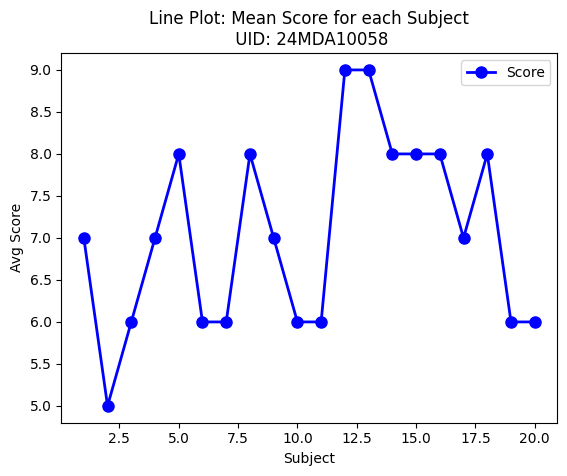

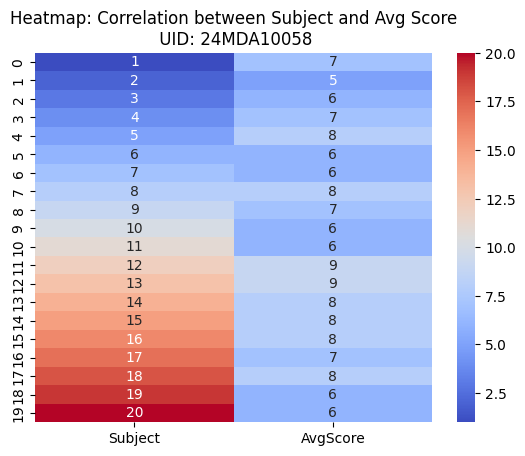

In [87]:
# C. DATA VISUALIZATION

# 1. Create a line plot using Matplotlib showing the trend of score feature for
# each of the 20 subjects involved in an attention experiment

plt.plot(grouped_data['Subj'], grouped_data['AvgScore'], marker='o', linestyle='-', color='b', linewidth=2, markersize=8, label='Score')

#Set labels and title and display the line plot
plt.xlabel('Subject')
plt.ylabel('Avg Score')
plt.title('Line Plot: Mean Score for each Subject\n UID: 24MDA10058')
plt.legend()
plt.show()


# 2. Plot a heatmap using Seaborn to visualize correlations between average score
# and each of the 20 subjects involved in an attention experiment
dataforhmap = grouped_data[['Subj','AvgScore']].reset_index()
dataforhmap.drop('index', axis=1, inplace=True)
dataforhmap.rename(columns={'Subj': 'Subject'}, inplace=True)
sns.heatmap(dataforhmap, annot=True, cmap='coolwarm')

#Set title and display the line plot
plt.title('Heatmap: Correlation between Subject and Avg Score\n UID: 24MDA10058')
plt.show()

Training set size: 48
Testing set size: 12
    Actual  Predicted
2        1   1.612132
50       3   2.000601
16       1   2.130090
22       2   1.871111
43       3   1.871111
Intercept: 1.2236636636636637
Coefficient: [0.12948949]


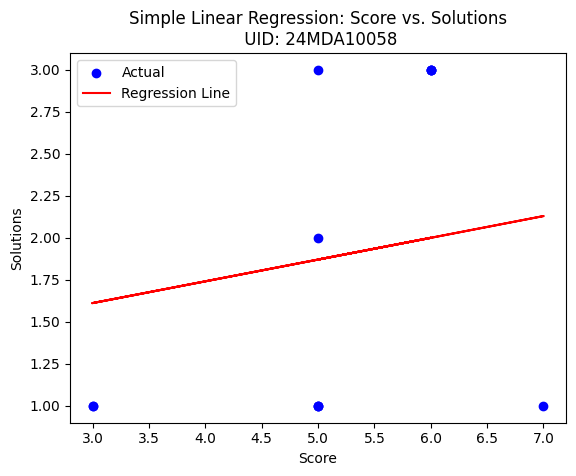

Mean Squared Error: 0.7991014930846762
R-squared score: 0.12159835874661562


In [132]:
# D. LINEAR REGRESSION

# Define the feature (independent variable) and target (dependent variable)
X = data[['score']]
y = data['solutions']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict avg score for the test set
y_pred = model.predict(X_test)

# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

# Print the intercept and coefficient
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

# Plot the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

plt.title('Simple Linear Regression: Score vs. Solutions\n UID: 24MDA10058')
plt.xlabel('Score')
plt.ylabel('Solutions')
plt.legend()
plt.show()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")